In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
links = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS INTERNSHIP INNO SEP/links.csv')
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS INTERNSHIP INNO SEP/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS INTERNSHIP INNO SEP/ratings.csv')
tags = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DS INTERNSHIP INNO SEP/tags.csv')

In [4]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [5]:
links.info()
movies.info()
ratings.info()
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  fl

In [6]:
# What is the shape of "movies.csv"

In [7]:
movies.shape

(9742, 3)

In [8]:
# What is the shape of "ratings.csv"

In [9]:
ratings.shape

(100836, 4)

In [10]:
# How many unique "userId" are available in "ratings.csv"

In [11]:
ratings.head(3)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224


In [12]:
ratings['userId'].nunique()

610

In [13]:
# Which movie has recieved maximum number of user ratings

In [14]:
movies.head(3)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


In [15]:
movie_rate = pd.merge(ratings, movies, on='movieId')
movie_rate.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


In [16]:
# Forrest Gump (1994) has recieved maximum number of user ratings of 329

Select all the correct tags submitted by users to "Matrix, The (1999)" movie

In [17]:
movie_tag = pd.merge(tags, movies, on='movieId')
movie_tag.head()

,userId,movieId,tag,timestamp,title,genres
0,2,60756,funny,1445714994,Step Brothers (2008),Comedy
1,2,60756,Highly quotable,1445714996,Step Brothers (2008),Comedy
2,2,60756,will ferrell,1445714992,Step Brothers (2008),Comedy
3,62,60756,comedy,1528934384,Step Brothers (2008),Comedy
4,62,60756,funny,1528934381,Step Brothers (2008),Comedy


In [18]:
movie_tag[movie_tag['title']=='Matrix, The (1999)']

,userId,movieId,tag,timestamp,title,genres
1270,424,2571,martial arts,1457842912,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1271,424,2571,sci-fi,1457842899,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1272,474,2571,alternate universe,1137204991,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1273,537,2571,philosophy,1424141098,"Matrix, The (1999)",Action|Sci-Fi|Thriller
1274,537,2571,post apocalyptic,1424141101,"Matrix, The (1999)",Action|Sci-Fi|Thriller


the correct tags submitted by users to "Matrix, The (1999)" movie are

    1.alternate universe
    2.philosophy
    3.post apocalyptic


What is the average user rating for movie named "Terminator 2: Judgment Day (1991)"?

In [19]:
movie_rate.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [20]:
movie_rate[movie_rate['title']=='Terminator 2: Judgment Day (1991)']['rating'].mean()

3.970982142857143

How does the data distribution of user ratings for "Fight Club (1999)" movie looks like?

In [21]:
dist_of_fight = movie_rate[movie_rate['title']=='Fight Club (1999)']['rating']
dist_of_fight.head()

,rating
14323,5.0
14324,2.0
14325,0.5
14326,2.5
14327,3.5


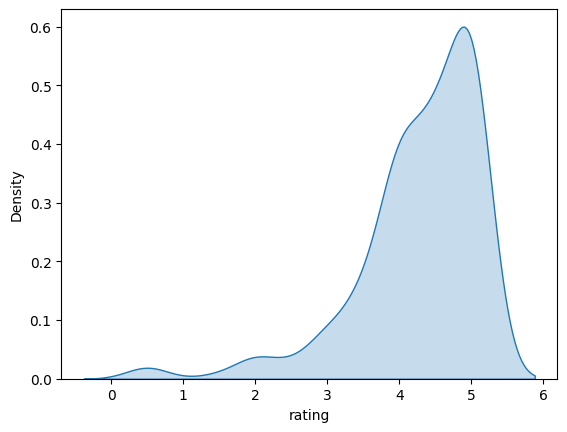

In [22]:
sns.kdeplot(dist_of_fight, fill = True)
plt.show()

Which movie is the most popular based on  average user ratings?


In [23]:
movie_rate.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [24]:
grouped_ratings = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])
merged_df = pd.merge(movies, grouped_ratings, on='movieId')

filtered_df = merged_df[merged_df['count'] > 50]
most_popular_movie = filtered_df.loc[filtered_df['mean'].idxmax()]

In [25]:
most_popular_movie['title']

'Shawshank Redemption, The (1994)'

In [26]:
 # Shawshank Redemption, The (1994) is the most popular based on  average user ratings

Select all the correct options which comes under top 5 popular movies based on number of user ratings.

In [27]:
movie_rate.groupby('title')['rating'].count().sort_values(ascending=False).head()

,rating
title,
Forrest Gump (1994),329
"Shawshank Redemption, The (1994)",317
Pulp Fiction (1994),307
"Silence of the Lambs, The (1991)",279
"Matrix, The (1999)",278


Which Sci-Fi movie is "third most popular" based on the number of user ratings

In [28]:
merged_df = pd.merge(movies, ratings, on='movieId')
filtered_df = merged_df.loc[merged_df['genres'].str.contains('Sci-Fi')]

filtered_df.groupby('title')['rating'].count().sort_values(ascending=False).index[2]

'Jurassic Park (1993)'

## Web Scraping IMDB Reviews




In [33]:
import requests
from bs4 import BeautifulSoup
import numpy as np

def scrapper(imdbId):
    id = str(int(imdbId))
    n_zeroes = 7 - len(id)
    new_id = "0" * n_zeroes + id
    URL = f"https://www.imdb.com/title/tt0{new_id}/"
    request_header = {
        'Content-Type': 'text/html; charset=UTF-8',
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0',
        'Accept-Encoding': 'gzip, deflate, br'
    }
    response = requests.get(URL, headers=request_header)
    soup = BeautifulSoup(response.text, 'html.parser')
    imdb_rating = soup.find('span', itemprop='ratingValue')
    return imdb_rating.text if imdb_rating else np.nan

In [39]:
imdb_ratings = pd.to_numeric(filtered_df['movieId'].apply(scrapper))